<center>
<img src="https://www.plri.de/assets/images/logo_plri_de.png"
width="200">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Siegel_TU_Braunschweig_transparent.svg/800px-Siegel_TU_Braunschweig_transparent.svg.png"
width="250">
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3d/Medizinische_Hochschule_Hannover_logo.svg"
width="250">
<img src="https://images.seeklogo.com/logo-png/38/2/universidad-nacional-autonoma-de-mexico-unam-logo-png_seeklogo-387361.png" width="110">
</center>

# **Estimation of Prediction for getting heart disease using Logistic                        Regression Model of Machine Learning**

**CONTENTS**


----------------------------------------

**🚀 HOW TO USE THE CODE?**

1. Open the Corazon(ITW_Modificado).ipynb notebook in Google Colab.

* Go to the menu: File > Save a copy to Drive
* Open the copy
* Gray cells with code are executed with Shift + Enter

----------------------------------------

**🔧 HOW TO RUN THE NOTEBOOK?**

1. Locate the block of code you want to run.
In the upper left corner of the block, click on the triangle button ▶️

2. Wait for a green check mark ✅ to appear next to the block: this indicates that it has finished executing.

----------------------------------------

**📝 ADDITIONAL NOTES**

- Theres detailed instructions at every step to help.

----------------------------------------
**🙋 IF YOU HAVE ANY QUESTIONS ABOUT HOW TO USE THE CODE, YOU CAN SEND US AN EMAIL**

Email for questions -- unam.tubs@gmail.com

Attach a screenshot if you get an error message.


# **1. Getting the Dataset**

Data Loading and Manipulation (*pandas*, *numpy*)

Data Visualization (*seaborn*, *matplotlib*)


---


The dataset is loaded from the *Framingham* database (a well-known epidemiological study in cardiovascular medicine).
It contains variables such as blood pressure, cholesterol levels, diabetes status, body mass index (BMI), smoking habits, and family history.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
heart_data= pd.read_csv("framingham.csv")
heart_data.head(15)
#print(str(len(heart_data.index)))


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# **2. Plotting the Graphs**

We visualize the number of individuals who have experienced a stroke in the dataset

<Axes: xlabel='prevalentStroke', ylabel='count'>

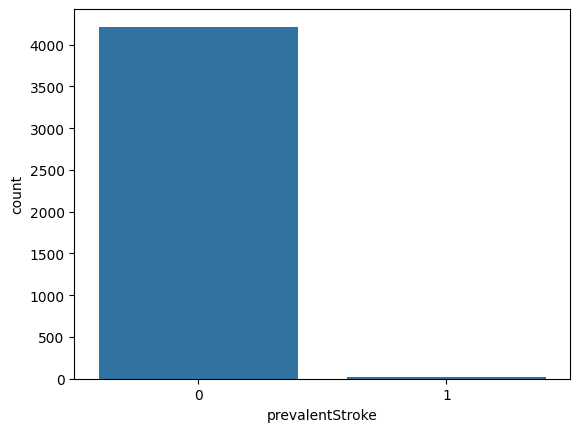

In [ ]:
sns.countplot(x="prevalentStroke", data=heart_data)

The graph shows the number of individuals with or without hypertension

A value of **0** indicates no history of hypertension, while a value of **1** indicates a prior diagnosis of hypertension

<Axes: xlabel='prevalentHyp', ylabel='count'>

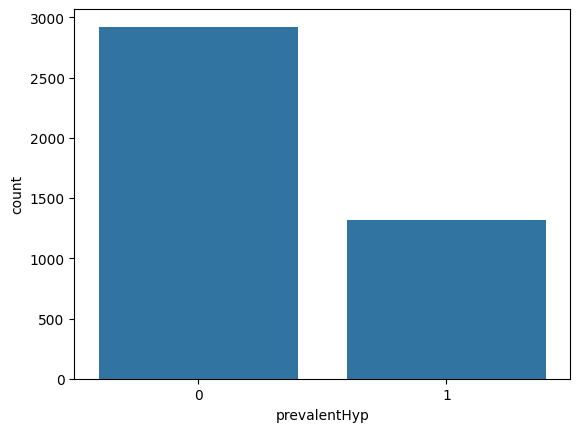

In [ ]:
sns.countplot(x="prevalentHyp", data=heart_data)

The graph shows the distribution of age among participants, differentiating between those who have and have not suffered a stroke

<Axes: ylabel='Frequency'>

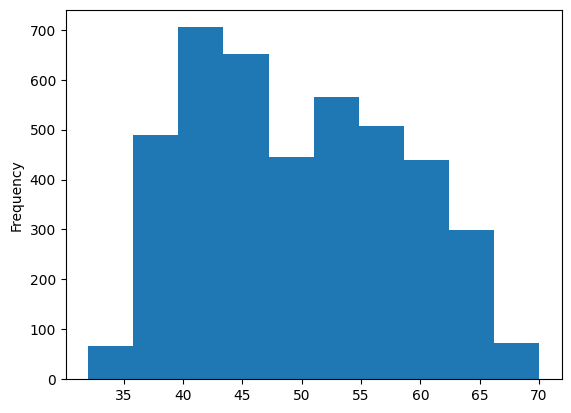

In [ ]:
heart_data["age"].plot.hist()

The graph shows how many cigarretes a day smoke each individual

<Axes: ylabel='Frequency'>

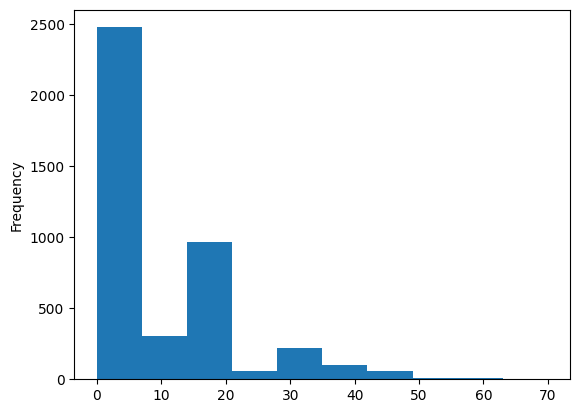

In [ ]:
heart_data["cigsPerDay"].plot.hist()

The graph shows the distribution of blood glucose levels

<Axes: ylabel='Frequency'>

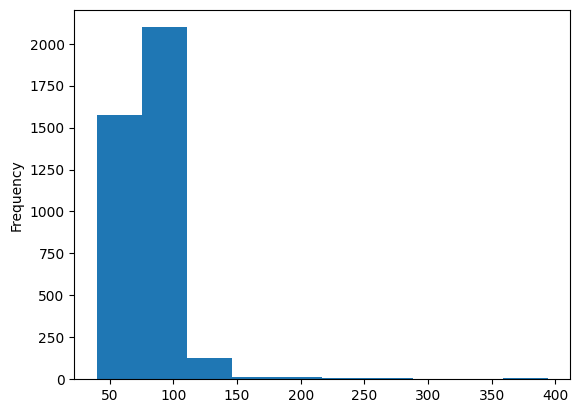

In [ ]:
heart_data["glucose"].plot.hist()

We plot the number of individuals who did or did not develop heart disease within the next 10 years

A value of **0** indicates that the individual did not develop the disease, while a value of **1** indicates that the individual did

<Axes: xlabel='TenYearCHD', ylabel='count'>

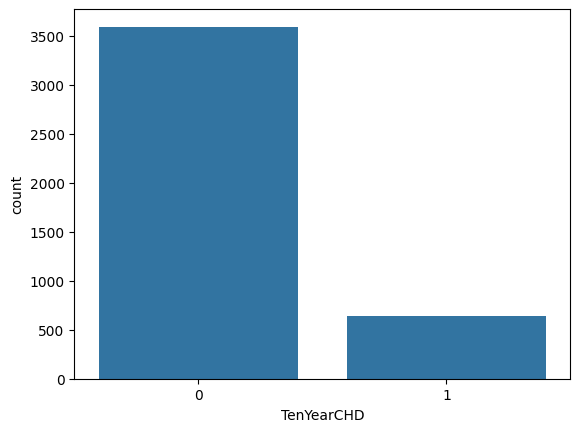

In [ ]:
sns.countplot(x="TenYearCHD", data=heart_data)

# **3. Finding the Null values**

In [ ]:
heart_data.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
heart_data.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


# **4. Plot the Heatmap**

<Axes: >

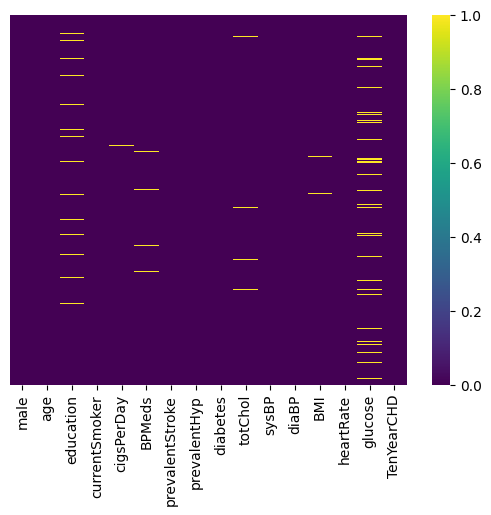

In [ ]:
sns.heatmap(heart_data.isnull(), yticklabels=False, cmap="viridis")

# **5. Droping the values**

The education column is removed from the table

In [ ]:
heart_data.drop("education", axis=1, inplace=True)
heart_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


We calculate the mean glucose level in the data

In [ ]:
m=np.mean(heart_data["glucose"])
print(m)

81.96365524402907


# **6. Replacing the Null Values**

Added values



---


Glucose: Its calculated mean

BMI: 25 (healthy threshold)

Cigarettes per day: 5 (average)

Heart rate: 90 bpm (normal value)

In [ ]:
heart_data["glucose"].replace(to_replace = np.nan, value = m, inplace=True)
heart_data["BMI"].replace(to_replace = np.nan, value = 25, inplace=True)
heart_data["cigsPerDay"].replace(to_replace = np.nan, value = 5, inplace=True)
heart_data["heartRate"].replace(to_replace = np.nan, value = 90, inplace=True)
heart_data.drop("currentSmoker", axis=1, inplace=True)

/tmp/ipython-input-2332138291.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data["glucose"].replace(to_replace = np.nan, value = m, inplace=True)
/tmp/ipython-input-2332138291.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

We replot the previous values including the values added in the previous cells

<Axes: ylabel='Frequency'>

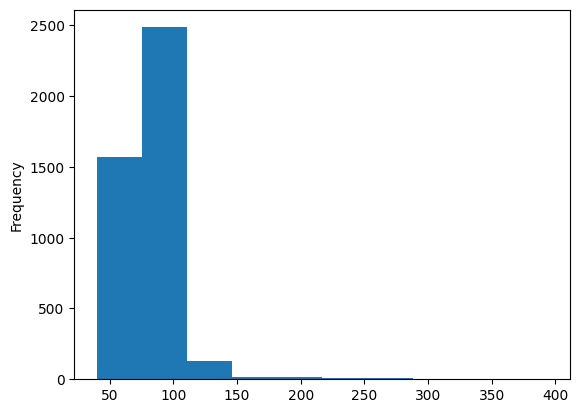

In [ ]:
heart_data["glucose"].plot.hist()

In [ ]:
heart_data.head(10)

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


This shows a heatmap of the missing values

<Axes: >

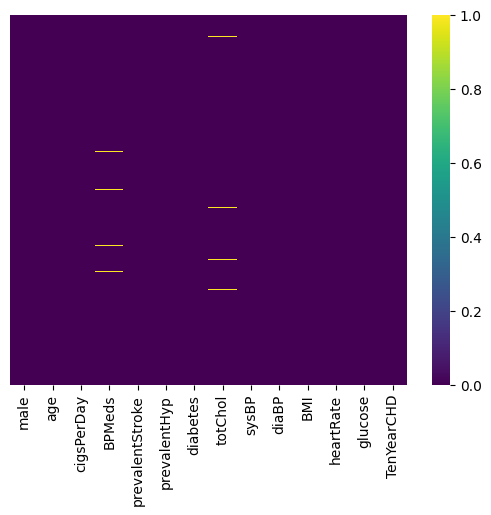

In [ ]:
sns.heatmap(heart_data.isnull(), yticklabels=False, cmap="viridis")

Fill the missing values in total cholesterol (*totChol*) with 247.0 mg/dL

Remove the *BPMeds* column, which indicates if the patient takes blood pressure medication

In [ ]:
heart_data["totChol"].replace(to_replace = np.nan, value = 247.0, inplace=True)
heart_data.drop("BPMeds", axis=1, inplace=True)

/tmp/ipython-input-1866346755.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data["totChol"].replace(to_replace = np.nan, value = 247.0, inplace=True)


We create a heatmap after cleaning the data

<Axes: >

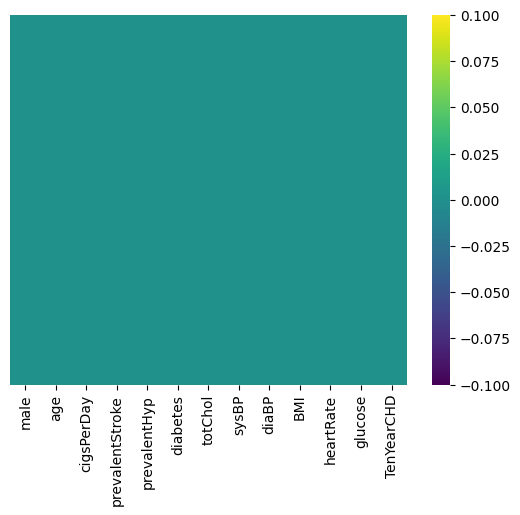

In [ ]:
sns.heatmap(heart_data.isnull(), yticklabels=False, cmap="viridis")


This check how many null values remain in each column

In [ ]:
heart_data.isnull().sum()

,0
male,0
age,0
cigsPerDay,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0
diaBP,0
BMI,0


Plot the distribution of the target variable (*TenYearCHD*)

A value of **0** means the patient did not develop heart disease within 10 years, and a value of **1** means they did

<Axes: xlabel='TenYearCHD', ylabel='count'>

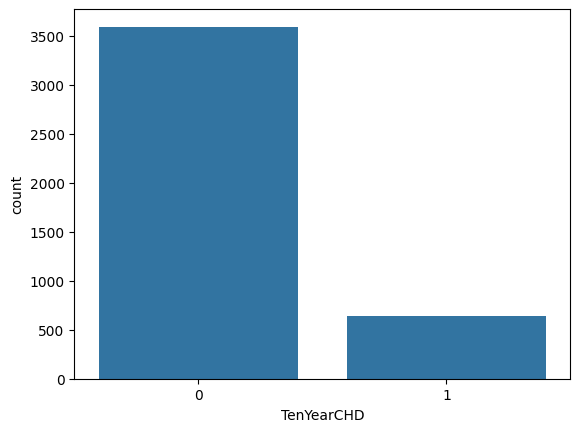

In [ ]:
sns.countplot(x="TenYearCHD", data=heart_data)

<span style="color:yellow">***x***</span> contains all the predictor variables.  
<span style="color:yellow">***y***</span> contains the target variable (heart disease).

In [ ]:
X=heart_data.drop("TenYearCHD",axis=1)
y=heart_data["TenYearCHD"].values
y

array([0, 0, 0, ..., 0, 0, 0])

# **7. Train and Test**



```
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
```

Split the dataset into 80% training and 20% testing




```
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
```
Train a logistic regression model with the training data and make predictions (*y_pred*) using the test data



```
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
```
Display a confusion matrix, which shows:

1. True positives

2. False positives

3. True negatives

4. False negatives




```
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy
```
Calculate the model's accuracy using the test data


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=15)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#Normalize the data attributes for the Iris dataset.
from sklearn.datasets import load_iris
from sklearn import preprocessing
# load the iris dataset
iris = load_iris()
print(iris.data.shape)
# separate the data from the target attributes
X = iris.data
y = iris.target
# normalize the data attributes
normalized_X = preprocessing.normalize(X)


(150, 4)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Display:

* ***Accuracy***: Percentage of correct predictions

* ***Precision***: Proportion of true positives

* ***Recall (sensitivity)***: How well the model detects actual positives

* ***F1 Score***: Harmonic mean between precision and recall

* ***Confusion matrix***: Detailed classifier performance

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8702830188679245
Precision Score : 0.8
Recall Score : 0.10084033613445378
F1 Score : 0.17910447761194032
Confusion Matrix : 
[[726   3]
 [107  12]]


Use *GridSearchCV* to find the best hyperparameters (*penalty, C*) for logistic regression.

Evaluate different combinations using the accuracy metric (*accuracy*).

Here we train the model.

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25,15,100]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred = grid_clf_acc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Sp

# **8.Accuracy Score**

Show the final accuracy of the model after hyperparameter tuning

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8714622641509434

# Conclusions

To start, we can see that we have some class imbalance in our data, which could be a problem in the future if we want to implement an ML model. However, I think it is understandable because not everybody has heart disease.

We have some missing data, but we can handle it since it is not a representative portion of our dataset. In my opinion and experience, it is not the best idea to impute missing values with the mean. Instead, we could use a GLM or simply delete those NA values if they are not too important.

Our logistic regression achieved a good accuracy score of 0.870, but we can still improve it by building a more complex model or by adding some L1 or L2 regularization.